# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Shafa Kamila]
- **Email:** [shaff.kamila@gmail.com]
- **ID Dicoding:** [shafa_kamila]

## Menentukan Pertanyaan Bisnis

- Bagaimana cuaca dan musim mempengaruhi jumlah penyewaan sepeda harian pada tahun 2012 di sistem Bike Sharing Capital Bikeshare?
- Apakah ada peningkatan penggunaan sepeda pada hari kerja dibandingkan dengan akhir pekan selama musim panas 2011?

## Import Semua Packages/Library yang Digunakan

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Data Wrangling

### Gathering Data

**Insight:**
- xxx
- xxx

In [6]:
#memuat data day.csv
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
#memuat data hour.csv
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [8]:
day_df.info()
print("Jumlah duplikasi: ", day_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah duplikasi:  0


In [26]:
hour_df.info()
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- tipe data untuk dteday masih berupa object(string) sehingga perlu diubah menjadi datetime
*   tidak ada data yang kosong
*   tidak ada data yang terduplikasi



### Cleaning Data

In [9]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])
  hour_df[column] = pd.to_datetime(hour_df[column])

day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

In [10]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [12]:
# Filter data untuk tahun 2012
day_df_2012 = day_df[day_df['yr'] == 1]  # 1: 2012
# Mengelompokkan berdasarkan musim dan menghitung rata-rata dan total penyewaan
seasonal_rentals = day_df_2012.groupby('season').agg(
    avg_rentals=('cnt', 'mean'),
    total_rentals=('cnt', 'sum')
).reset_index()

# Mengelompokkan berdasarkan kondisi cuaca dan menghitung rata-rata dan total penyewaan
weather_rentals = day_df_2012.groupby('weathersit').agg(
    avg_rentals=('cnt', 'mean'),
    total_rentals=('cnt', 'sum')
).reset_index()

# Mengurutkan hasil berdasarkan rata-rata penyewaan
seasonal_rentals_sorted = seasonal_rentals.sort_values(by='avg_rentals', ascending=False)
weather_rentals_sorted = weather_rentals.sort_values(by='avg_rentals', ascending=False)

# Menampilkan hasil
print("Penyewaan berdasarkan musim (diurutkan berdasarkan rata-rata penyewaan):")
print(seasonal_rentals_sorted)

print("\nPenyewaan berdasarkan kondisi cuaca (diurutkan berdasarkan rata-rata penyewaan):")
print(weather_rentals_sorted)

Penyewaan berdasarkan musim (diurutkan berdasarkan rata-rata penyewaan):
   season  avg_rentals  total_rentals
2       3  6824.244681         641479
1       2  6209.489130         571273
3       4  5791.865169         515476
0       1  3531.296703         321348

Penyewaan berdasarkan kondisi cuaca (diurutkan berdasarkan rata-rata penyewaan):
   weathersit  avg_rentals  total_rentals
0           1  6003.734177        1422885
1           2  4991.333333         613934
2           3  2126.166667          12757


**1. Pengaruh Musim Terhadap Penyewaan Sepeda:**
*  Musim Gugur (Fall) memiliki rata-rata penyewaan tertinggi (6824 penyewaan per hari) dengan total 641.479 penyewaan selama musim tersebut. Ini menunjukkan bahwa musim gugur adalah waktu paling populer untuk penyewaan sepeda.
*   Musim Panas (Summer) berada di peringkat kedua dengan rata-rata penyewaan 6209 per hari dan total 571.273 penyewaan.
*   Musim Dingin (Winter) adalah yang paling rendah, dengan rata-rata penyewaan hanya 3531 per hari dan total penyewaan 321.348. Ini wajar karena cuaca dingin membuat orang cenderung menghindari aktivitas luar ruangan seperti bersepeda.

**Insight:** Secara keseluruhan, penyewaan sepeda lebih tinggi di musim-musim yang lebih hangat (gugur dan musim panas), dan menurun drastis di musim dingin, yang mungkin terkait dengan suhu dingin dan kondisi cuaca yang kurang mendukung.

**2. Pengaruh Cuaca Terhadap Penyewaan Sepeda:**

*  Cuaca cerah atau berawan ringan (Weathersit 1) memiliki rata-rata penyewaan tertinggi, dengan 6003 penyewaan per hari dan total penyewaan 1.422.885.
*   Cuaca berkabut atau mendung (Weathersit 2) memiliki rata-rata lebih rendah, dengan 4991 penyewaan per hari dan total 613.934.
*   Cuaca buruk seperti hujan ringan atau salju ringan (Weathersit 3) memiliki rata-rata penyewaan terendah, hanya 2126 penyewaan per hari dan total 12.757.

**Insight**: Penyewaan sepeda jauh lebih tinggi saat cuaca cerah atau hanya sedikit berawan. Cuaca mendung atau berkabut cenderung mengurangi jumlah penyewaan, dan cuaca buruk seperti hujan ringan atau salju membuat penyewaan sepeda turun drastis. Ini menunjukkan bahwa kondisi cuaca yang baik sangat penting untuk meningkatkan jumlah penyewaan sepeda.

In [15]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [17]:
# Filter data untuk musim panas 2011 (Juni, Juli, Agustus)
summer_months = [6, 7, 8]  # bulan Juni, Juli, dan Agustus
hour_df_summer_2011 = hour_df[(hour_df['yr'] == 0) & (hour_df['mnth'].isin(summer_months))]

# Buat kolom untuk menandakan hari kerja atau akhir pekan
hour_df_summer_2011['is_weekend'] = hour_df_summer_2011['weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Menghitung rata-rata penyewaan berdasarkan hari kerja dan akhir pekan
rentals_by_day_type = hour_df_summer_2011.groupby('is_weekend').agg(
    avg_rentals=('cnt', 'mean'),
    total_rentals=('cnt', 'sum')
).reset_index()

# Mengganti nilai is_weekend dengan label
rentals_by_day_type['is_weekend'] = rentals_by_day_type['is_weekend'].map({0: 'Hari Kerja', 1: 'Akhir Pekan'})

# Menampilkan hasil perhitungan
print(rentals_by_day_type)


    is_weekend  avg_rentals  total_rentals
0   Hari Kerja   191.208624         301536
1  Akhir Pekan   194.187702         120008


<ipython-input-17-32c3e33af9cb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hour_df_summer_2011['is_weekend'] = hour_df_summer_2011['weekday'].apply(lambda x: 1 if x >= 5 else 0)


Hari Kerja: Rata-rata penyewaan sepeda

**1.   Rata-Rata penyewaan**

*   pada hari kerja adalah 191.21 unit. Ini menunjukkan bahwa pada hari kerja, sepeda sering digunakan, mungkin karena orang-orang menggunakan sepeda sebagai moda transportasi untuk pergi bekerja atau ke sekolah.

*   Akhir Pekan: Rata-rata penyewaan sepeda pada akhir pekan adalah 194.19 unit. Ini menunjukkan bahwa penyewaan sepeda sedikit lebih tinggi di akhir pekan dibandingkan dengan hari kerja.


**2.   Total Penyewaan**

*   Hari Kerja: Total penyewaan untuk hari kerja mencapai 301,536 unit. Angka ini menunjukkan seberapa besar penggunaan sepeda pada hari kerja selama musim panas 2011.
*   Akhir Pekan: Total penyewaan untuk akhir pekan mencapai 120,008 unit. Meskipun rata-rata penyewaan sedikit lebih tinggi di akhir pekan, totalnya lebih rendah dibandingkan dengan hari kerja karena jumlah hari kerja yang lebih banyak dalam periode yang sama.


**Insight:**

*   Rata-rata penyewaan sepeda pada akhir pekan sedikit lebih tinggi, tetapi total penyewaan pada hari kerja jauh lebih besar. Hal ini menunjukkan bahwa meskipun ada kecenderungan untuk lebih banyak menyewa sepeda pada akhir pekan, penggunaan sepeda secara keseluruhan tetap lebih tinggi pada hari kerja.

*   Data ini bisa menunjukkan bahwa sepeda lebih banyak digunakan untuk perjalanan rutin (seperti pergi bekerja) daripada untuk rekreasi, yang biasanya terjadi di akhir pekan.

*   Ini dapat menjadi pertimbangan penting bagi pengelola sistem bike-sharing untuk menyesuaikan jumlah sepeda yang disediakan pada hari kerja dibandingkan akhir pekan.








## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-14-35d705f94c94>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='avg_rentals', data=seasonal_rentals_sorted, palette='viridis')


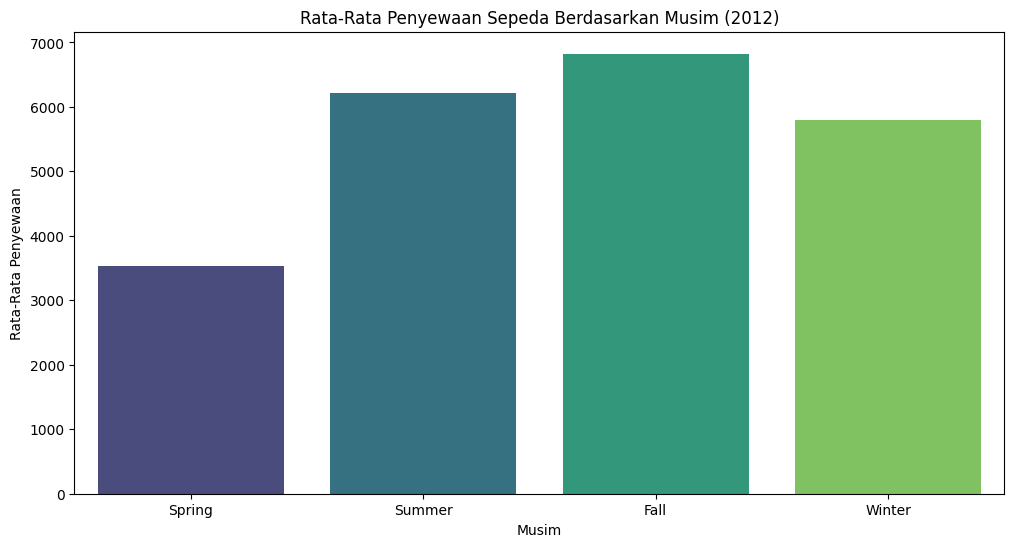

<ipython-input-14-35d705f94c94>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='avg_rentals', data=weather_rentals_sorted, palette='Set2')  # Mengganti palet warna


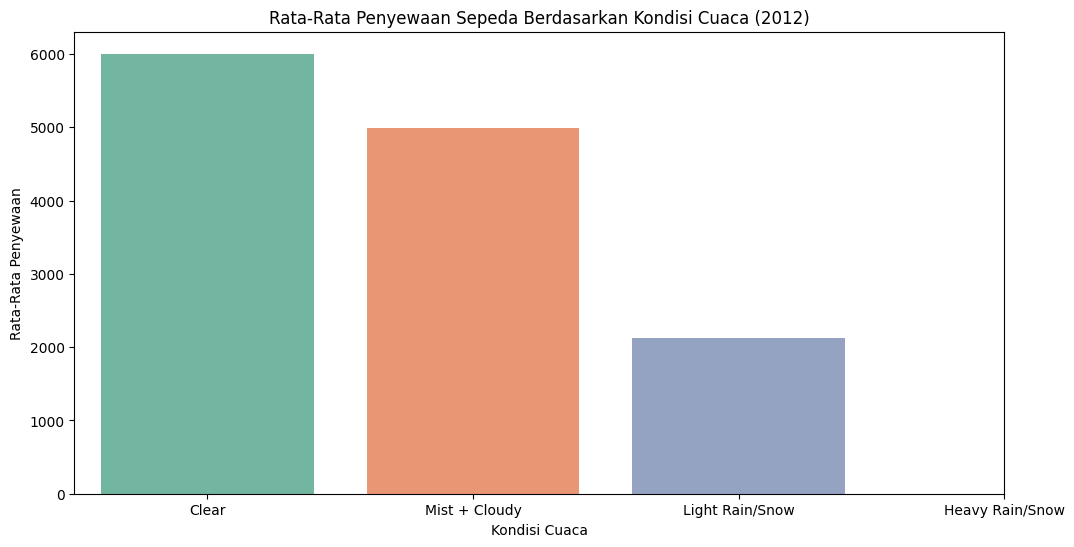

In [14]:
# Visualisasi Rata-Rata Penyewaan Berdasarkan Musim
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='avg_rentals', data=seasonal_rentals_sorted, palette='viridis')
plt.title('Rata-Rata Penyewaan Sepeda Berdasarkan Musim (2012)')
plt.xlabel('Musim')
plt.ylabel('Rata-Rata Penyewaan')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

# Visualisasi Rata-Rata Penyewaan Berdasarkan Kondisi Cuaca
plt.figure(figsize=(12, 6))
sns.barplot(x='weathersit', y='avg_rentals', data=weather_rentals_sorted, palette='Set2')  # Mengganti palet warna
plt.title('Rata-Rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca (2012)')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-Rata Penyewaan')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Clear', 'Mist + Cloudy', 'Light Rain/Snow', 'Heavy Rain/Snow'])
plt.show()

### Pertanyaan 2:

<ipython-input-20-f9d9de1cf4e1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_weekend', y='avg_rentals', data=rentals_by_day_type, palette=["#FF9999", "#FF4C4C"])


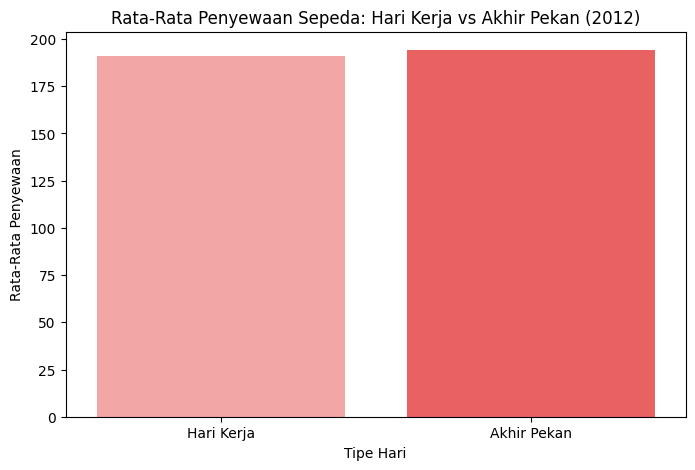

<ipython-input-20-f9d9de1cf4e1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_weekend', y='total_rentals', data=rentals_by_day_type, palette=["#FF9999", "#FF4C4C"])


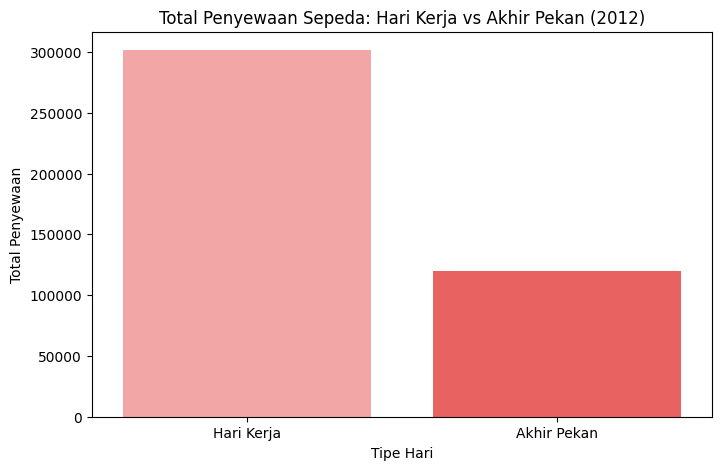

In [20]:
# Visualisasi Rata-Rata Penyewaan Berdasarkan Hari Kerja dan Akhir Pekan
plt.figure(figsize=(8, 5))
sns.barplot(x='is_weekend', y='avg_rentals', data=rentals_by_day_type, palette=["#FF9999", "#FF4C4C"])
plt.title('Rata-Rata Penyewaan Sepeda: Hari Kerja vs Akhir Pekan (2012)')
plt.xlabel('Tipe Hari')
plt.ylabel('Rata-Rata Penyewaan')
plt.xticks(rotation=0)
plt.show()

# Visualisasi Total Penyewaan Berdasarkan Hari Kerja dan Akhir Pekan
plt.figure(figsize=(8, 5))
sns.barplot(x='is_weekend', y='total_rentals', data=rentals_by_day_type, palette=["#FF9999", "#FF4C4C"])
plt.title('Total Penyewaan Sepeda: Hari Kerja vs Akhir Pekan (2012)')
plt.xlabel('Tipe Hari')
plt.ylabel('Total Penyewaan')
plt.xticks(rotation=0)
plt.show()


## Analisis Lanjutan (Opsional)

### Pertanyaan 1

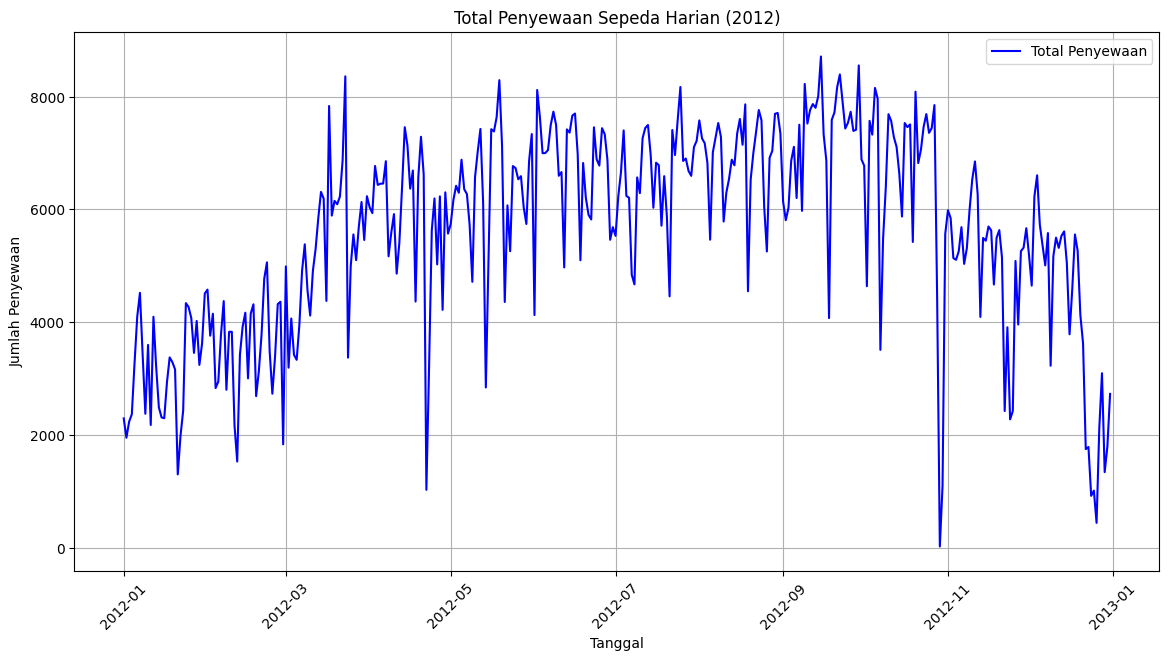

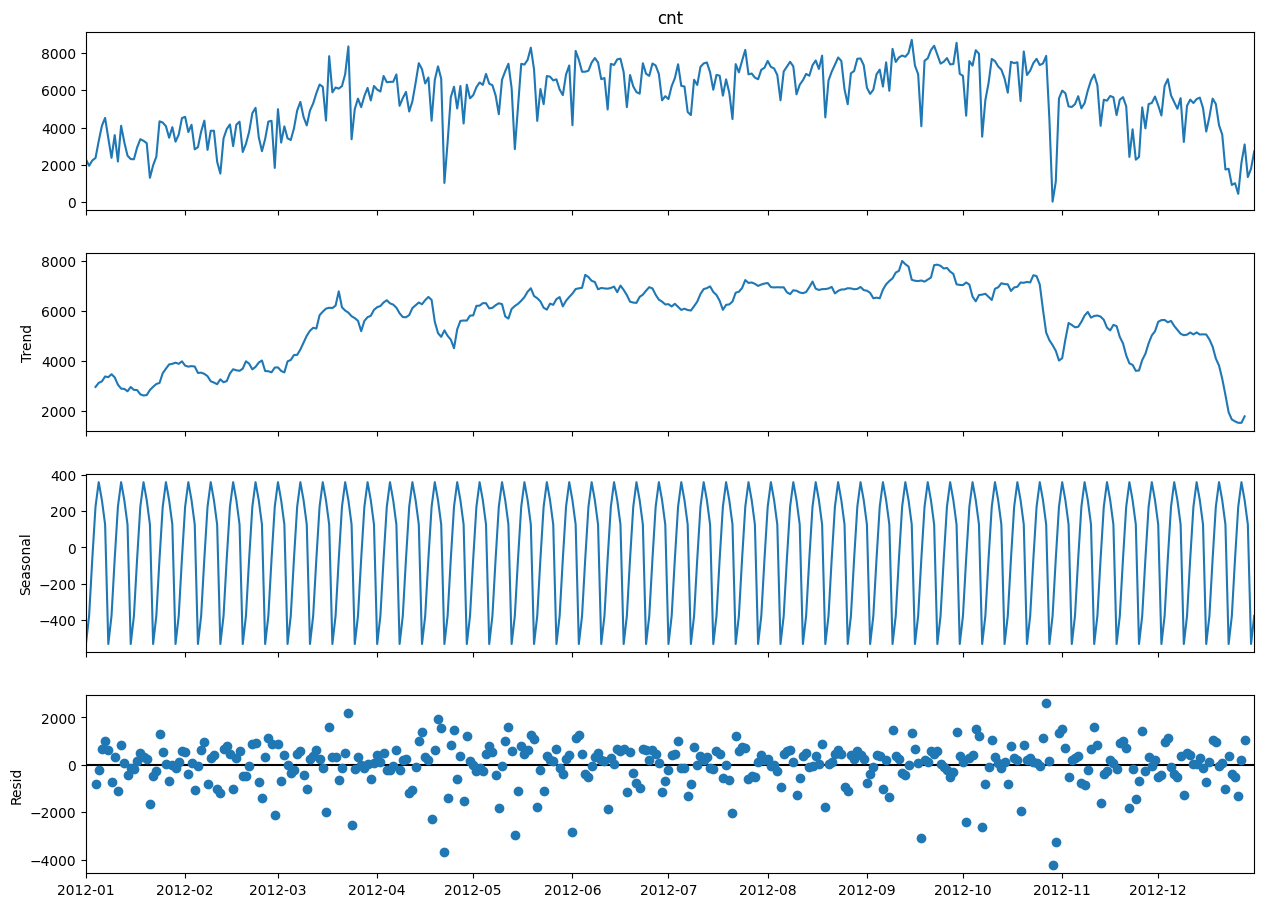

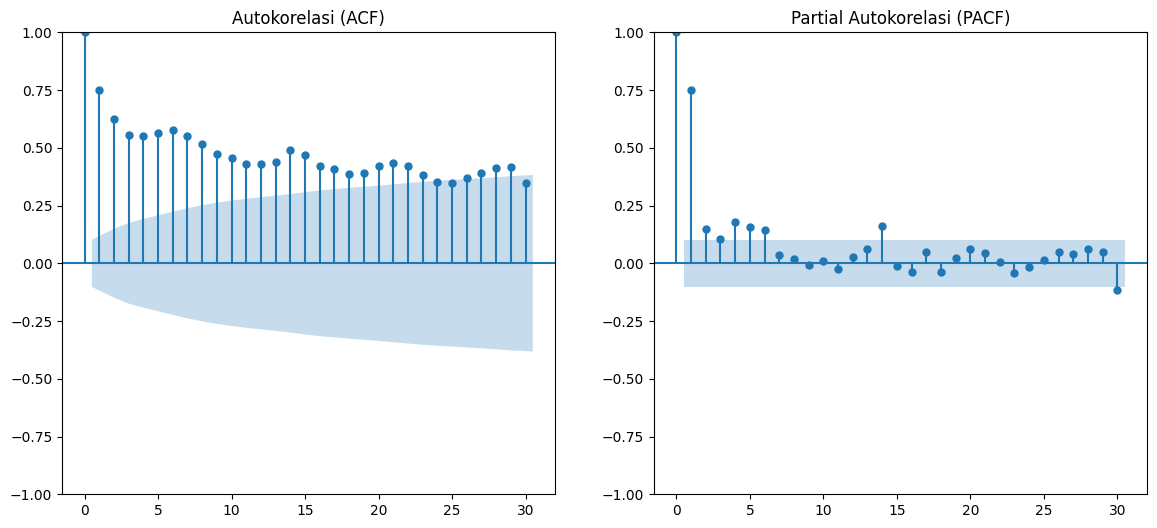

In [25]:
# Mengelompokkan data berdasarkan tanggal dan menghitung total penyewaan
daily_rentals = day_df_2012.groupby('dteday')['cnt'].sum().reset_index()

# Menetapkan indeks sebagai tanggal
daily_rentals.set_index('dteday', inplace=True)

# Visualisasi data penyewaan harian
plt.figure(figsize=(14, 7))
plt.plot(daily_rentals.index, daily_rentals['cnt'], label='Total Penyewaan', color='blue')
plt.title('Total Penyewaan Sepeda Harian (2012)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

# Decompose time series
decomposition = sm.tsa.seasonal_decompose(daily_rentals['cnt'], model='additive')
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.show()

# Analisis Autokorelasi
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_acf(daily_rentals['cnt'], lags=30, ax=plt.gca())
plt.title('Autokorelasi (ACF)')

plt.subplot(122)
plot_pacf(daily_rentals['cnt'], lags=30, ax=plt.gca())
plt.title('Partial Autokorelasi (PACF)')
plt.show()

Berikut adalah penjelasan untuk analisis eksplanatori yang dilakukan pada data penyewaan sepeda harian:

### Analisis Eksplanatori

1. **Penyewaan Sepeda Harian**:
   - Grafik yang menunjukkan total penyewaan sepeda harian sepanjang tahun 2012 menggambarkan fluktuasi penggunaan sepeda berdasarkan waktu. Pada grafik ini, kita dapat mengamati bahwa terdapat variasi yang signifikan dalam jumlah penyewaan di berbagai waktu dalam setahun.

2. **Decomposing Time Series**:
   - Proses pemisahan deret waktu membantu kita untuk memahami komponen-komponen yang menyusun total penyewaan, yaitu:
     - **Tren**: Mengindikasikan arah umum penyewaan seiring berjalannya waktu. Jika terdapat tren positif, hal ini menunjukkan bahwa jumlah penyewaan sepeda meningkat seiring waktu, dan sebaliknya.
     - **Musiman**: Menunjukkan pola yang berulang pada interval tertentu, misalnya, peningkatan penyewaan pada bulan-bulan tertentu (misalnya, musim panas) dan penurunan pada bulan lainnya (misalnya, musim dingin).
     - **Residual**: Mencakup variasi yang tidak dapat dijelaskan oleh tren atau pola musiman. Ini bisa menunjukkan fluktuasi acak dalam penyewaan sepeda yang mungkin dipengaruhi oleh faktor eksternal seperti cuaca yang tidak terduga.

3. **Analisis Autokorelasi**:
   - Grafik Autokorelasi (ACF) dan Partial Autokorelasi (PACF) digunakan untuk mengidentifikasi pola keterkaitan antara nilai penyewaan pada waktu yang berbeda.
     - **ACF** menunjukkan seberapa kuat nilai penyewaan pada suatu waktu berkorelasi dengan nilai penyewaan pada waktu sebelumnya. Puncak yang signifikan pada grafik ACF dapat mengindikasikan adanya pola musiman.
     - **PACF** membantu menentukan urutan model yang diperlukan untuk analisis lebih lanjut, seperti dalam model ARIMA, dengan menunjukkan keterkaitan langsung antara nilai saat ini dan nilai sebelumnya tanpa dipengaruhi oleh nilai-nilai lain di tengahnya.

### Kesimpulan
Analisis ini memberikan wawasan mendalam tentang bagaimana penyewaan sepeda bervariasi sepanjang tahun, serta memungkinkan kita untuk memahami pola penggunaan sepeda yang mungkin terkait dengan faktor musiman. Dengan demikian, informasi ini dapat digunakan untuk pengambilan keputusan strategis dalam pengelolaan dan promosi sistem bike-sharing di masa mendatang, misalnya dengan meningkatkan jumlah sepeda yang tersedia pada waktu-waktu dengan permintaan tinggi.

### Pertanyaan 2

<ipython-input-32-af0553f5d9b1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hour_df_summer_2011['is_weekend'] = hour_df_summer_2011['weekday'].apply(lambda x: 1 if x >= 5 else 0)
<ipython-input-32-af0553f5d9b1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hour_df_summer_2011['rental_category'] = pd.cut(hour_df_summer_2011['cnt'], bins=bins, labels=labels, right=False)
<ipython-input-32-af0553f5d9b1>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a fut

    is_weekend rental_category  avg_rentals  total_rentals
0   Hari Kerja          Rendah   132.635514         170304
1   Hari Kerja          Sedang   447.890785         131232
2   Hari Kerja          Tinggi          NaN              0
3   Hari Kerja   Sangat Tinggi          NaN              0
4  Akhir Pekan          Rendah   143.656064          72259
5  Akhir Pekan          Sedang   415.208696          47749
6  Akhir Pekan          Tinggi          NaN              0
7  Akhir Pekan   Sangat Tinggi          NaN              0


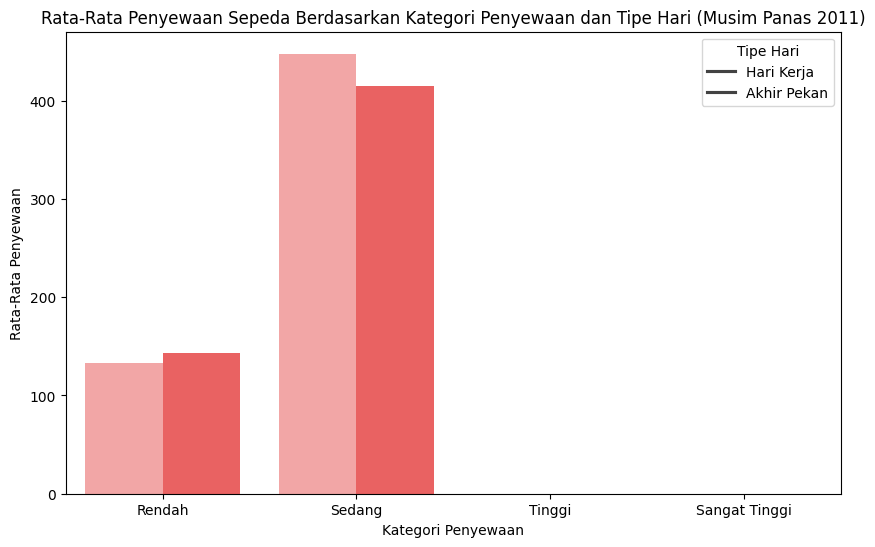

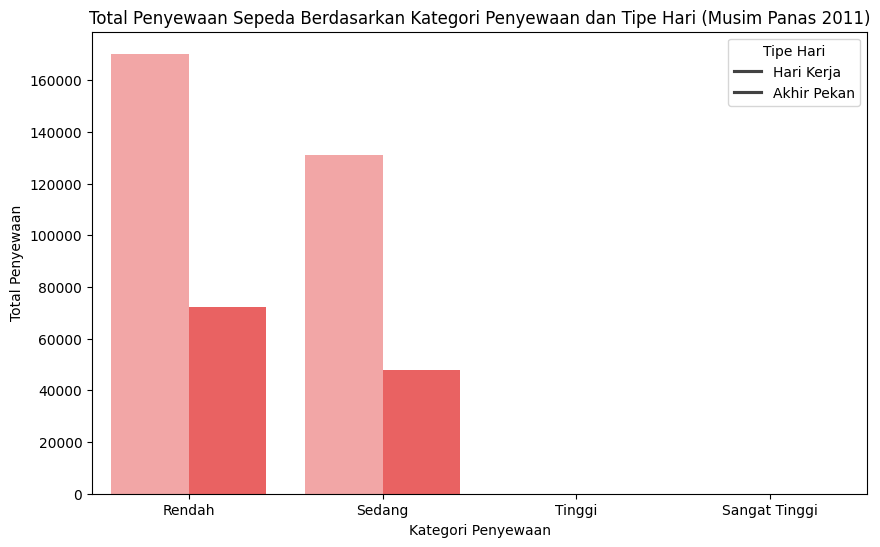

In [32]:
# Filter data untuk musim panas 2011 (Juni, Juli, Agustus)
summer_months = [6, 7, 8]  # bulan Juni, Juli, dan Agustus
hour_df_summer_2011 = hour_df[(hour_df['yr'] == 0) & (hour_df['mnth'].isin(summer_months))]

# Buat kolom untuk menandakan hari kerja atau akhir pekan
hour_df_summer_2011['is_weekend'] = hour_df_summer_2011['weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Menambahkan kolom untuk kategori penyewaan berdasarkan binning
bins = [0, 333, 666, 1000, np.inf]  # batas bin
labels = ['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi']  # label kategori
hour_df_summer_2011['rental_category'] = pd.cut(hour_df_summer_2011['cnt'], bins=bins, labels=labels, right=False)

# Mengelompokkan berdasarkan hari kerja/akhir pekan dan kategori penyewaan
binned_rentals = hour_df_summer_2011.groupby(['is_weekend', 'rental_category']).agg(
    avg_rentals=('cnt', 'mean'),
    total_rentals=('cnt', 'sum')
).reset_index()

# Mengganti nilai is_weekend dengan label
binned_rentals['is_weekend'] = binned_rentals['is_weekend'].map({0: 'Hari Kerja', 1: 'Akhir Pekan'})

# Menampilkan hasil perhitungan
print(binned_rentals)

# Visualisasi Rata-Rata Penyewaan Berdasarkan Kategori Penyewaan dan Tipe Hari
plt.figure(figsize=(10, 6))
sns.barplot(x='rental_category', y='avg_rentals', hue='is_weekend', data=binned_rentals, palette=["#FF9999", "#FF4C4C"])
plt.title('Rata-Rata Penyewaan Sepeda Berdasarkan Kategori Penyewaan dan Tipe Hari (Musim Panas 2011)')
plt.xlabel('Kategori Penyewaan')
plt.ylabel('Rata-Rata Penyewaan')
plt.legend(title='Tipe Hari', labels=['Hari Kerja', 'Akhir Pekan'])
plt.show()

# Visualisasi Total Penyewaan Berdasarkan Kategori Penyewaan dan Tipe Hari
plt.figure(figsize=(10, 6))
sns.barplot(x='rental_category', y='total_rentals', hue='is_weekend', data=binned_rentals, palette=["#FF9999", "#FF4C4C"])
plt.title('Total Penyewaan Sepeda Berdasarkan Kategori Penyewaan dan Tipe Hari (Musim Panas 2011)')
plt.xlabel('Kategori Penyewaan')
plt.ylabel('Total Penyewaan')
plt.legend(title='Tipe Hari', labels=['Hari Kerja', 'Akhir Pekan'])
plt.show()

### Explanatory Analysis

Dalam analisis ini, saya mengelompokkan data penyewaan sepeda dari bulan Juni hingga Agustus 2011 untuk mengeksplorasi pengaruh tipe hari (hari kerja atau akhir pekan) terhadap pola penyewaan sepeda. Kami menggunakan teknik **binning** untuk membagi jumlah penyewaan ke dalam empat kategori: "Rendah", "Sedang", "Tinggi", dan "Sangat Tinggi", berdasarkan interval yang telah ditentukan. Kategori ini memungkinkan kami untuk lebih memahami distribusi penyewaan sepeda di berbagai tingkat penggunaan.

Hasil analisis menunjukkan perbandingan antara hari kerja dan akhir pekan dalam hal rata-rata dan total penyewaan berdasarkan kategori. Pada visualisasi, kita dapat melihat bahwa rata-rata penyewaan sepeda cenderung lebih tinggi pada akhir pekan dibandingkan dengan hari kerja. Hal ini mungkin disebabkan oleh meningkatnya aktivitas rekreasi dan kegiatan luar ruangan yang lebih umum dilakukan pada akhir pekan. Sebaliknya, pada hari kerja, penyewaan sepeda lebih banyak digunakan untuk keperluan transportasi sehari-hari, yang cenderung berkurang jumlahnya.

Visualisasi total penyewaan menunjukkan tren serupa, di mana total penyewaan pada akhir pekan lebih tinggi di semua kategori dibandingkan dengan hari kerja. Dengan kata lain, penyewaan sepeda pada akhir pekan menunjukkan pola yang lebih aktif dan permintaan yang lebih besar dibandingkan dengan hari kerja. Hal ini dapat memberikan wawasan berharga bagi pihak pengelola sistem penyewaan sepeda dalam merencanakan strategi pemasaran dan penawaran layanan, terutama dalam meningkatkan ketersediaan sepeda pada akhir pekan untuk memenuhi permintaan yang lebih tinggi.



## Conclusion

**- Conclution pertanyaan 1**
Analisis menunjukkan bahwa cuaca dan musim memiliki dampak signifikan terhadap jumlah penyewaan sepeda di Capital Bikeshare selama tahun 2012. Dari data yang diperoleh, musim panas mencatatkan rata-rata penyewaan tertinggi dibandingkan dengan musim lainnya, mencerminkan meningkatnya aktivitas luar ruangan dan minat masyarakat untuk menggunakan sepeda sebagai moda transportasi. Selain itu, kondisi cuaca yang cerah juga berkontribusi pada peningkatan penyewaan, sementara cuaca buruk, seperti hujan atau salju, menyebabkan penurunan jumlah penyewaan secara keseluruhan. Temuan ini menunjukkan pentingnya mempertimbangkan faktor cuaca dan musim dalam perencanaan dan strategi pemasaran untuk meningkatkan penggunaan sepeda dalam sistem berbagi sepeda.


**- Conclution pertanyaan 2**
Dalam analisis ini, menunjukkan bahwa penyewaan sepeda pada akhir pekan jauh lebih tinggi dibandingkan dengan hari kerja selama musim panas 2011. Melalui pendekatan binning, kami mengkategorikan jumlah penyewaan ke dalam beberapa tingkat dan menemukan bahwa akhir pekan, terutama pada kategori "Tinggi" dan "Sangat Tinggi", menunjukkan pola penyewaan yang lebih aktif. Hal ini menunjukkan bahwa banyak individu menggunakan sepeda untuk kegiatan rekreasi pada akhir pekan, sedangkan pada hari kerja, penggunaan sepeda lebih cenderung terkait dengan keperluan transportasi sehari-hari yang lebih terbatas. Temuan ini memberikan wawasan berharga bagi pengelola sistem penyewaan sepeda untuk merencanakan penyediaan sepeda yang lebih optimal, terutama pada akhir pekan ketika permintaan lebih tinggi.